# Importing the required Libraries

In [2]:
import pandas as pd
import numpy as np
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import exc
from sqlalchemy import inspect
import seaborn as sns
import matplotlib.pyplot as plt

# Establishing a connection to Database

In [3]:
# Define your database connection details.
dbname = "dap_project"
user = "postgres"
password = "postgres"
host = "localhost"


# Connect to the database.
conn = psycopg2.connect(database=dbname,
                        user=user,
                        password=password,
                        host=host)

print("connection successfull")

connection successfull


# Loading the data from Database to a Dataframe

In [4]:
try:
    query = 'SELECT * FROM chicago_crime'
    vis_df = pd.read_sql(query, conn)
    
    print("Data loaded from PostgreSQL to DataFrame successfully!")
except Exception as e:
    print("Error loading data from PostgreSQL to DataFrame:", e)a

Data loaded from PostgreSQL to DataFrame successfully!


/var/folders/pp/93wc99kj26b3hg5_2y8sxlpm0000gn/T/ipykernel_56171/3033380388.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vis_df = pd.read_sql(query, conn)


In [5]:
vis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   10000 non-null  object
 1   location               10000 non-null  object
 2   primary_description    10000 non-null  object
 3   secondary_description  10000 non-null  object
 4   landmark               10000 non-null  object
 5   arrest                 10000 non-null  object
 6   domestic               10000 non-null  object
 7   beat                   10000 non-null  object
 8   ward                   10000 non-null  object
 9   fbi_cd                 10000 non-null  object
dtypes: object(10)
memory usage: 781.4+ KB


# Visualisations

In [ ]:
#What is the distribution of crimes by primary and secondary description?

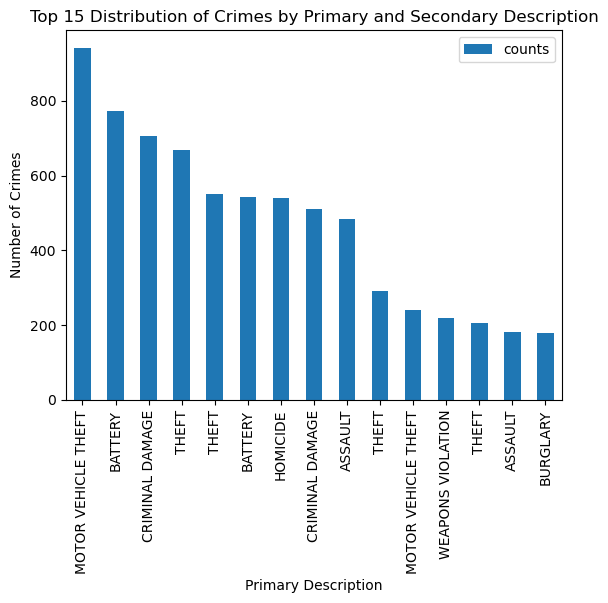

In [17]:
grouped_data = vis_df.groupby(['primary_description', 'secondary_description']).size().reset_index(name='counts')
# Sort the data by counts in descending order
sorted_data = grouped_data.sort_values(by='counts', ascending=False)
# Select only the top 10 rows
top_15 = sorted_data.head(15)
# Plot the data using a stacked bar chart
top_15.plot(kind='bar', x='primary_description', y='counts', stacked=True)
# Add a title and labels
plt.title('Top 15 Distribution of Crimes by Primary and Secondary Description')
plt.xlabel('Primary Description')
plt.ylabel('Number of Crimes')

plt.show()

In [7]:
#How does the crime count vary in regards to FBI criminal offences?

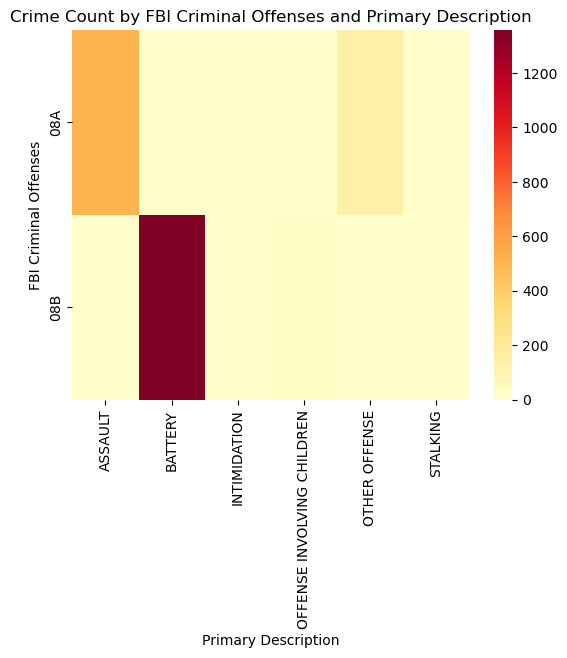

In [18]:
# Filter the data to only include FBI criminal offenses
fbi_data = vis_df[vis_df['fbi_cd'].str.startswith('08')]

# Group the data by FBI criminal offenses and primary description and count the number of crimes
grouped_data = fbi_data.groupby(['fbi_cd', 'primary_description']).size().reset_index(name='counts')

# Pivot the data to create a 2D array of the crime count by FBI criminal offenses and primary description
pivot_data = grouped_data.pivot(index='fbi_cd', columns='primary_description', values='counts').fillna(0)

# Create a heatmap of the crime count by FBI criminal offenses and primary description
sns.heatmap(pivot_data, cmap='YlOrRd')

# Add a title and labels
plt.title('Crime Count by FBI Criminal Offenses and Primary Description')
plt.xlabel('Primary Description')
plt.ylabel('FBI Criminal Offenses')

plt.show()

In [ ]:
#What is the distribution of criminal offenses by FBI criminal code and primary description?

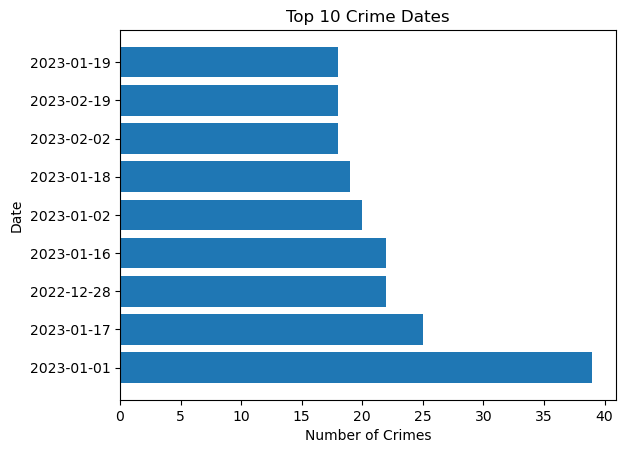

In [21]:
# Convert the date column to a datetime object
vis_df['date'] = pd.to_datetime(vis_df['date'])

# Count the number of crimes for each date
date_counts = vis_df['date'].value_counts()

# Get the top 10 crime dates
top_10_dates = date_counts.head(15)

# Create a horizontal bar chart of the data
plt.barh(top_10_dates.index.strftime('%Y-%m-%d'), top_10_dates.values)

# Add a title and labels
plt.title('Top 10 Crime Dates')
plt.xlabel('Number of Crimes')
plt.ylabel('Date')

plt.show()

In [13]:
#What are the top 10 dates with the highest number of crimes?

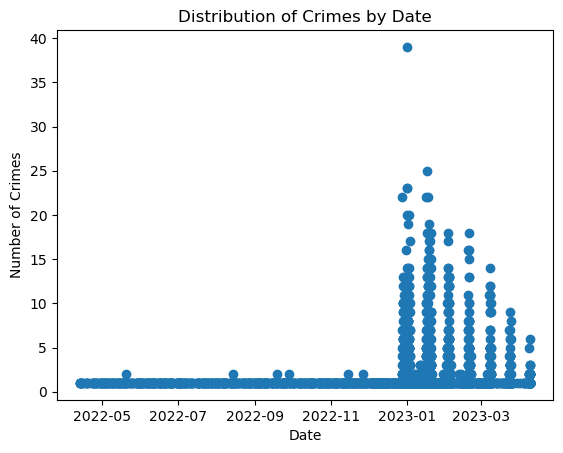

In [23]:
# Convert the date column to a datetime object
vis_df['date'] = pd.to_datetime(vis_df['date'])

# Count the number of crimes for each date
date_counts = vis_df['date'].value_counts()

# Create a scatter chart of the data
plt.scatter(date_counts.index, date_counts.values)

# Add a title and labels
plt.title('Distribution of Crimes by Date')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')

plt.show()
